In [60]:
import pandas as pd
import numpy as np
#AdmissionData = pd.read_csv('data.csv',sep=',',index_col = False)
#del AdmissionData['Serial No.']
#ran = np.random.rand(len(AdmissionData)) < 0.8
#train = AdmissionData[ran]
#val = AdmissionData[~ran]
#train = AdmissionData.sample(frac = 0.8)
#val = AdmissionData.loc[~AdmissionData.index.isin(train.index)]
#train.to_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index = False)
#val.to_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index = False)
train = pd.read_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index_col = False)
val = pd.read_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index_col = False)

#train = pd.read_csv('UsedTrainingDataForAdmissionDs.csv',sep=',',index_col = False)
#val = pd.read_csv('UsedValidationDataForAdmissionDs.csv',sep=',',index_col = False)

tempTrain = train.loc[:,train.columns != 'Chance of Admit ']
new_colTrain = [1]*len(train)
tempTrain.insert(loc=0, column='intercept', value=new_colTrain)
trainXmatrix = tempTrain.values
trainXmatrix -= np.mean(trainXmatrix,axis = 0)
trainXmatrix[:,1:] /= np.std(trainXmatrix.astype(float),axis = 0)[1:]
trainXmatrix[:,0] = 1

tempVal = val.loc[:,val.columns != 'Chance of Admit ']
new_colVal = [1]*len(val)
tempVal.insert(loc=0, column='intercept', value=new_colVal)
ValXmatrix = tempVal.values
ValXmatrix -= np.mean(ValXmatrix,axis = 0)
ValXmatrix[:,1:] /= np.std(ValXmatrix.astype(float),axis = 0)[1:]
ValXmatrix[:,0] = 1

numOfSamples,numOfdimPlusOne = trainXmatrix.shape
#numOfSamples,numOfdimPlusOne

In [3]:
def getSigmoid(x,theta):
    x = np.array(x)
    theta = np.array(theta)
    k = theta@x
    return 1/(1+np.exp(-k))

In [33]:
train["binaryPrediction"] = [1.0 if x >= 0.725 else 0.0 for x in train["Chance of Admit "]]
val["binaryPrediction"] = [1.0 if x >= 0.725 else 0.0 for x in val["Chance of Admit "]]
value = 0.0
count0 = 0
count1 = 0
for x in train["binaryPrediction"]:
    if x == value: count0+=1
    else: count1+=1
print(count0)
print(count1)
print('hola')

174
186
hola


train.head()

np.arange(float(0.5), float(1), float(0.025))

In [53]:
#for threshold1 in np.arange(float(0.5), float(1), float(0.05)):
#    train["binaryPrediction"] = [1.0 if x >= threshold1 else 0.0 for x in train["Chance of Admit "]]
#    val["binaryPrediction"] = [1.0 if x >= threshold1 else 0.0 for x in val["Chance of Admit "]]
thresholdValues = []
PrecisionValues =[]
RecallValues =[]
f1Score = []
#for threshold in np.arange(float(0.5), float(1), float(0.025)):
for threshold in np.arange(float(0.5), float(1), float(0.05)):

#for threshold in [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]:
    train["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in train["Chance of Admit "]]
    val["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in val["Chance of Admit "]]
    value = 0.0
    count0 = 0
    count1 = 0
    for x in train["binaryPrediction"]:
        if x == value: count0+=1
        else: count1+=1
    #print(count0)
    #print(count1)
    #print('hola')
#AdmissionData["binaryPrediction"]
    trainYvector = train["binaryPrediction"].values
    valYvector = val["binaryPrediction"].values
    iterations = 0
    theta = np.array([0.5]*numOfdimPlusOne) #initialization
    alpha = 0.00005
    alpha = 0.005
    residual = 10
    #while iterations <50:
    likelyHood = 1000

    while residual > 0.005:
        beforetheta = theta.copy()
        #print("iteration is "+str(iterations))
        #print("theta is "+str(theta))
        beforelikelyHood = likelyHood
        iterations += 1
        likelyHood = 0
        for k in range(0,numOfSamples):
            if trainYvector[k] == 1.0:
                likelyHood += np.log(getSigmoid(trainXmatrix[k,:],theta))
            else:
                likelyHood += np.log(1-getSigmoid(trainXmatrix[k,:],theta))   
        #print("likelyHood is "+str(likelyHood))     
        for j in range(0,numOfdimPlusOne):
            tempj = 0
            for i in range(0,numOfSamples):
                tempj += (alpha*(trainYvector[i]-getSigmoid(trainXmatrix[i,:],theta))*trainXmatrix[i,j])
            theta[j] += tempj   
        #residual = np.linalg.norm(theta-beforetheta)
        residual = np.linalg.norm(likelyHood-beforelikelyHood)
        #print(theta)
        #print(beforetheta)
        #print(residual)

    Ypredicted = np.array([0]*len(valYvector))
    for i in range(0,len(ValXmatrix)):
        if getSigmoid(ValXmatrix[i,:],theta)> threshold:
            Ypredicted[i] = 1.0
        else:
            Ypredicted[i] = 0.0    
    conMatrix = pd.crosstab(Ypredicted,valYvector)

    #print('threshold is' +str(threshold))
    #print(conMatrix)
    if(conMatrix.shape == (2,2)):
        sum1 = 0
        for i in range(0,2):
            for j in range(0,2):
                if i==j:
                    sum1 += conMatrix[i][j]

        #print(sum1)
        #print(np.sum(np.sum(conMatrix)))
        #print('accuracy is ')
        #print(sum1/np.sum(np.sum(conMatrix)))
        #threshold = Decimal(threshold) ** -2
        print('threshold is ' +str('%.2f' % threshold)+' accuracy is '+str('%.2f' % (sum1/np.sum(np.sum(conMatrix)))))

        thresholdValues.append(threshold)
        precision = (conMatrix[1][1]/(conMatrix[1][0]+conMatrix[1][1]))
        recall = (conMatrix[1][1]/(conMatrix[0][1]+conMatrix[1][1]))
        F1score = (2*precision*recall)/(precision+recall)
        PrecisionValues.append(precision)
        RecallValues.append(recall)
        f1Score.append(F1score)

        #PrecisionValues.append(conMatrix[0][0]/(conMatrix[0][0]+conMatrix[0][1]))
        #RecallValues.append(conMatrix[0][0]/(conMatrix[0][0]+conMatrix[1][0]))




threshold is 0.50 accuracy is 0.97
threshold is 0.55 accuracy is 0.91
threshold is 0.60 accuracy is 0.84
threshold is 0.65 accuracy is 0.79
threshold is 0.70 accuracy is 0.91
threshold is 0.75 accuracy is 0.94
threshold is 0.80 accuracy is 0.92
threshold is 0.85 accuracy is 0.96
threshold is 0.90 accuracy is 0.99


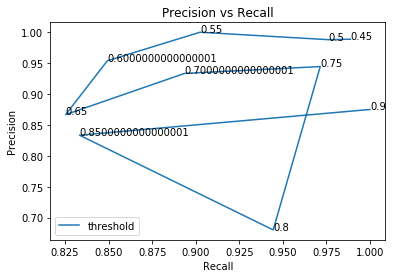

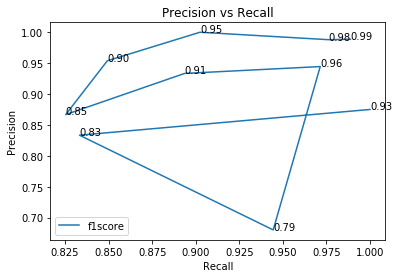

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
ax.plot(RecallValues[:],PrecisionValues[:], label='threshold')
#for i, txt in enumerate([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
formatedf1score = [ '%.2f' % elem for elem in f1Score ]
for i,txt in enumerate(thresholdValues):
#for i, txt in enumerate(formatedf1score):
    ax.annotate(txt, (RecallValues[i], PrecisionValues[i]))
ax.legend(loc=3) # upper left corner
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision vs Recall');

fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
ax.plot(RecallValues[:],PrecisionValues[:], label='f1score')
#for i, txt in enumerate([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
formatedf1score = [ '%.2f' % elem for elem in f1Score ]
#for i,txt in enumerate(thresholdValues):
for i, txt in enumerate(formatedf1score):
    ax.annotate(txt, (RecallValues[i], PrecisionValues[i]))
ax.legend(loc=3) # upper left corner
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision vs Recall');



Text(0, 0.5, 'Threshold')

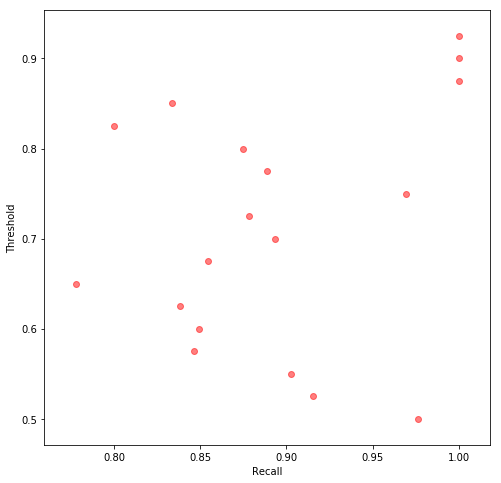

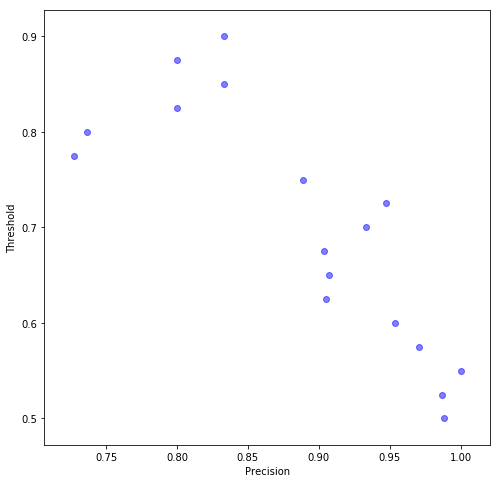

In [39]:
fig = plt.figure(figsize=(8,8))
plt.scatter(RecallValues,thresholdValues, color='red',alpha = 0.5)
#plt.scatter(PrecisionValues,thresholdValues,color='blue',alpha =0.5)
plt.xlabel('Recall')
plt.ylabel('Threshold')
fig = plt.figure(figsize=(8,8))
#plt.scatter(RecallValues,thresholdValues, color='red',alpha = 0.5)
plt.scatter(PrecisionValues[:-1],thresholdValues[:-1],color='blue',alpha =0.5)
plt.xlabel('Precision')
plt.ylabel('Threshold')
#plt.savefig('../output_data/pic1.png')
#plt.title('')
#fig1 = plt.figure(figsize=(8,8))
#plt.scatter(y, z, color=colors1,alpha = 0.5)
#plt.xlabel('satisfaction_level')
#plt.ylabel('average_montly_hours')

In [40]:

#print(Yvector)
#YminusSigmoidOfX = np.array([Yvector[j] - getSigmoid(Xmatrix[j],theta) for j in range(0,numOfSamples)])
#gradientVector = np.array([sum(YminusSigmoidOfX*Xmatrix[:,j]) for j in range(0,numOfdimPlusOne)])  
#type(gradientVector)

In [57]:
#conMatrix

conMatrix[0][0]

conMatrix.shape == (1,2)

# Part2(KNN)

In [59]:
import pandas as pd
import numpy as np
#AdmissionData = pd.read_csv('data.csv',sep=',',index_col = False)
#AdmissionData.head()
#train = AdmissionData.sample(frac = 0.8)
#val = AdmissionData.loc[~AdmissionData.index.isin(train.index)]
#train.to_csv('UsedTrainingDataForAdmissionKnnDs.csv',sep=',',index = False)
#val.to_csv('UsedValidationDataForAdmissionKnnDs.csv',sep=',',index = False)
train = pd.read_csv('UsedTrainingDataForAdmissionKnnDs.csv',sep=',',index_col = False)
val = pd.read_csv('UsedValidationDataForAdmissionKnnDs.csv',sep=',',index_col = False)

In [56]:
import math 
def  getDistBetweenPoints(Point1,Point2,method,parameter):
    #print(parameter)
    row1 = np.array(Point1[1:len(Point1)-2])
    row2 = np.array(Point2[1:len(Point1)-2])
    #print(row1)
    #print(row2)
    if method == 'Euclidean':
        return (np.sum((np.abs(row1-row2))**2))**(1/2)
    elif method == 'Minkowski':
        return (np.sum(np.abs((row1-row2))**float(parameter)))**(1/float(parameter))
    elif method == 'Chebyshey':
        return np.max(np.abs(row1-row2))        
    elif method == 'Cosine':
        return 1-((sum((row1)*(row2)))/(np.sqrt(sum((row1)**2))*np.sqrt(sum((row2)**2))))
    elif method == 'Manhattan':
        return np.sum(np.abs(row1-row2))
    elif method == 'Hellinger':        
        return (1/np.sqrt(2))*np.sqrt(np.sum((np.abs(np.sqrt(row1)-np.sqrt(row2)))**2))
    elif method == 'Bray-Curtis':
        return sum(abs(row1-row2))/sum(abs(row1+row2))
    elif method == 'Canberra':
        return sum(abs(row1-row2))/sum(abs(row1)+abs(row2))
    elif method == 'Pearson':
        tempMeanRow1 = sum(row1) / float(len(row1))
        tempMeanRow2 = sum(row2) / float(len(row2))
        return 1-((sum((row1-tempMeanRow1)*(row2-tempMeanRow2)))/(np.sqrt(sum((row1-tempMeanRow1)**2))*np.sqrt(sum((row2-tempMeanRow2)**2))))
        
def getDistanceFromAllPoints(Point,distance_method,parameter):
    DistancesFromAllOtherPoints ={}
    for index,row in train.iterrows():
        DistancesFromAllOtherPoints[row[0]] = [getDistBetweenPoints(list(row),Point,distance_method,parameter),row[-1]]
    return DistancesFromAllOtherPoints
def getLabel(Point,distance_method,parameter,NumOfNeighbours):
    NearestNeighboursAndTheirDistances = {}  
    DistancesFromAllOtherPoints = getDistanceFromAllPoints(Point,distance_method,parameter)
    NearestNeighboursAndTheirDistances = dict(sorted(DistancesFromAllOtherPoints.items(), key=lambda e: e[1][0])[0:NumOfNeighbours])
    NumberOfClassZero = 0
    NumberOfClassOne = 0
    #print(NearestNeighboursAndTheirDistances)
    for key, value in NearestNeighboursAndTheirDistances.items():
        if int(NearestNeighboursAndTheirDistances[key][1]) == int(1):
            NumberOfClassOne += 1
        else:
            NumberOfClassZero += 1    
    if(NumberOfClassOne>NumberOfClassZero):
        return 1
    else:
        return 0          
def compute(GivenDataSet,distance_method,parameter,NumOfNeighbours):
    GivenDataSet["predict"] = [0]*len(GivenDataSet)
    for index,row in GivenDataSet.iterrows():
        predictedValue = getLabel(row.tolist(),distance_method,parameter,NumOfNeighbours)
        GivenDataSet.at[int(index),'predict'] = predictedValue
        #print(str(index)+")Actual Value is "+str(GivenDataSet.at[int(index),"binaryPrediction"])+" Predicted Value is "+str(predictedValue))
    #caluculate accuracy and precision
    #return GivenDataSet
def CalulatePrecsionRecallEtc(GivenTestData):
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    for i in list(GivenTestData.index.values):
        if str(GivenTestData.at[i,"binaryPrediction"]) == str(1) and str(GivenTestData.at[i,'predict']) == str(1):
            TP = TP + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(1) and str(GivenTestData.at[i,'predict']) == str(0):
            FN = FN + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(0) and str(GivenTestData.at[i,'predict']) == str(1):
            FP = FP + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(0) and str(GivenTestData.at[i,'predict']) == str(0):
            TN = TN + 1
    print("Results On GivenTestData")
    print("-------------------------------------------------")
    #print("True Positive are    "+ str(TP))
    #print("True Negatives are   "+ str(TN))
    #print("False Positive are   "+ str(FP))
   # print("False Negatives are  "+str(FN))
    Precision = (TP/(TP+FP))
    Recall = (TP/(TP+FN))
    F1_Score = 2*((1/Recall)+(1/Precision))
    accuracy = (TN+TP)/(TN+TP+FP+FN)
    print("Precsion is          "+str(Precision))
    print("Recall is            "+str(Recall))
    print("F1_Score is          "+str(F1_Score))
    print("Accuracy is          "+str(accuracy))
    print("-------------------------------------------------")

def getAccuracy(GivenTestData):
    TN = 0
    FP = 0
    FN = 0
    TP = 0
    for i in list(GivenTestData.index.values):
        if str(GivenTestData.at[i,"binaryPrediction"]) == str(1) and str(GivenTestData.at[i,'predict']) == str(1):
            TP = TP + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(1) and str(GivenTestData.at[i,'predict']) == str(0):
            FN = FN + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(0) and str(GivenTestData.at[i,'predict']) == str(1):
            FP = FP + 1
        elif str(GivenTestData.at[i,"binaryPrediction"]) == str(0) and str(GivenTestData.at[i,'predict']) == str(0):
            TN = TN + 1
    Precision = (TP/(TP+FP))
    Recall = (TP/(TP+FN))
    accuracy = (TN+TP)/(TN+TP+FP+FN)
    return accuracy

def computeConMatrix(GivenTestData,threshold):
    conMatrix = pd.crosstab(GivenTestData["binaryPrediction"],GivenTestData["predict"])    
    if(conMatrix.shape == (2,2)):
        #print(conMatrix)
        sum1 = 0
        for i in range(0,2):
            for j in range(0,2):
                if i==j:
                    sum1 += conMatrix[i][j]

        #print(sum1)
        #print(np.sum(np.sum(conMatrix)))
        #print('accuracy is ')
        #print(sum1/np.sum(np.sum(conMatrix)))
        #thresholdValues.append(threshold)
        print('threshold is ' +str('%.2f' % threshold)+' accuracy is '+str('%.2f' % (sum1/np.sum(np.sum(conMatrix)))))
        precision = (conMatrix[1][1]/(conMatrix[1][0]+conMatrix[1][1]))
        recall = (conMatrix[1][1]/(conMatrix[0][1]+conMatrix[1][1]))
        F1score = (2*precision*recall)/(precision+recall)
        PrecisionValues.append(precision)
        RecallValues.append(recall)
        f1Score.append(F1score)
        
thresholdValues = []
PrecisionValues =[]
RecallValues =[]
f1Score = []
for threshold in np.arange(float(0.5), float(1), float(0.05)):   
    train["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in train["Chance of Admit "]]
    val["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in val["Chance of Admit "]]
    #print('threshold is'+str(threshold))
    thresholdValues.append(threshold)
    #train["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in train["Chance of Admit "]]
    #val["binaryPrediction"] = [1.0 if x >= threshold else 0.0 for x in val["Chance of Admit "]]

    NumOfNeighbours = 12
    distance_method = 'Euclidean'
    #'Euclidean' 'Minkowski' 'Chebyshey''Cosine''Manhattan' 'Mahalanobis' 'Hellinger''Bray-Curtis' 'Canberra''Pearson'
    GivenDataSet = val.copy()
    parameter = 0.5
    #import sys
    #filename = sys.argv[1]
    #GivenDataSet = pd.read_csv(filename,sep='\s+',header=None,names = ['class','a1','a2','a3','a4','a5','a6','Id'],index_col = False)
    compute(GivenDataSet,distance_method,parameter,NumOfNeighbours)
    computeConMatrix(GivenDataSet,threshold)
#CalulatePrecsionRecallEtc(GivenDataSet)
#GivenDataSet



threshold is 0.50 accuracy is 0.96
threshold is 0.55 accuracy is 0.90
threshold is 0.60 accuracy is 0.84
threshold is 0.65 accuracy is 0.81
threshold is 0.70 accuracy is 0.80
threshold is 0.75 accuracy is 0.90
threshold is 0.80 accuracy is 0.93
threshold is 0.85 accuracy is 0.96
threshold is 0.90 accuracy is 0.93


PrecisionValues

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots()
#for i in enumerate(thresholdValues):
ax.plot(RecallValues[:],PrecisionValues[:], label='threshold')
#for i, txt in enumerate([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]):
#for i, txt in enumerate([0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95,1]):
#formatedf1score = [ '%.2f' % elem for elem in f1Score ]
#for i, txt in enumerate(formatedf1score):
for i, txt in enumerate(thresholdValues):
    ax.annotate(txt, (RecallValues[i], PrecisionValues[i]))
ax.legend(loc=3) # upper left corner
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision vs Recall');
